In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

qiskit_runtime_service.__init__:INFO:2024-03-08 14:34:26,801: Default instance: ibm-q/open/main


In [1]:
import qiskit
print(qiskit.__version__)


1.0.2


In [2]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()
 
# Previous
from qiskit import BasicAer
backend = BasicAer.get_backend("statevector_simulator")
statevector = backend.run(qc).result().get_statevector()
 
# Current
qc.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(qc)

Traceback (most recent call last):
  Cell In[2], line 10
    from qiskit import BasicAer
ImportError: cannot import name 'BasicAer' from 'qiskit' (/opt/conda/lib/python3.10/site-packages/qiskit/__init__.py)

Use %tb to get the full traceback.


In [9]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()
 
"""# Previous
from qiskit import BasicAer
backend = BasicAer.get_backend("qasm_simulator")
result = backend.run(qc).result()"""
 
# One current option
from qiskit.providers.basic_provider import BasicProvider
backend = BasicProvider().get_backend("basic_simulator")
result = backend.run(qc).result()



# Get counts from the result
counts = result.get_counts()

from qiskit.visualization import plot_histogram
 
print(counts)
data = [counts]
plot_histogram(data)
print("h")
"""# Another current option is to specify it directly
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
result = backend.run(qc).result()"""

{'110': 272, '111': 270, '001': 223, '000': 259}
h


'# Another current option is to specify it directly\nfrom qiskit.providers.basic_provider import BasicSimulator\nbackend = BasicSimulator()\nresult = backend.run(qc).result()'

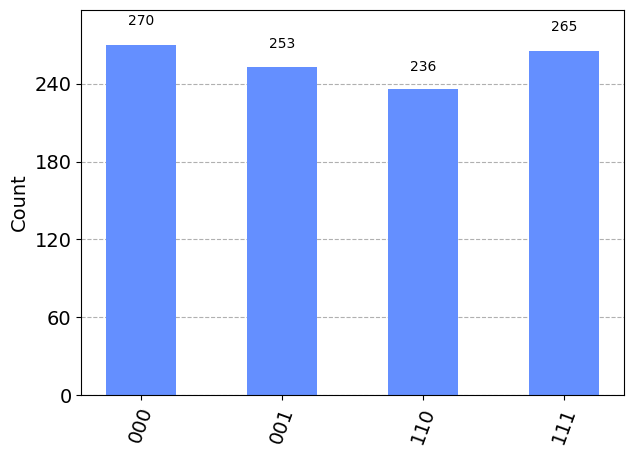

In [11]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

# Create a quantum circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.cx(1, 2)
qc.measure_all()

# Get the BasicSimulator backend from the BasicProvider
backend = BasicProvider().get_backend("basic_simulator")

# Simulate the quantum circuit
result = backend.run(qc).result()

# Get counts from the result
counts = result.get_counts()

# Plot the histogram
plot_histogram(counts)
